<a href="https://colab.research.google.com/github/samarthya04/AI_Lab/blob/main/lab6_2205498.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Assignment 6:** Path Planning for a Robot

Objective: Use A* Search to find an optimal path for a robot navigating a 2Dgrid.

Problem Statement: A robot must move from a start point to a goal in a grid whileavoiding obstacles.

Tasks:

Implement A* with:
- The Manhattan distance heuristic applies to grids without any diagonal movement.
- The Euclidean distance heuristic is applicable to grids that allowdiagonal
movement.
- Use a plotting library to visualize the found path.
- Compare A* with BFS and Uniform Cost Search.

In [10]:
import numpy as np
import heapq
import matplotlib.pyplot as plt
from collections import deque
import math

In [11]:
DIRECTIONS_4 = [(0, 1), (1, 0), (0, -1), (-1, 0)]
DIRECTIONS_8 = DIRECTIONS_4 + [(1, 1), (-1, -1), (1, -1), (-1, 1)]

In [12]:
def manhattan(p1, p2):
    return abs(p1[0] - p2[0]) + abs(p1[1] - p2[1])

def euclidean(p1, p2):
    return math.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

In [13]:
def a_star(grid, start, goal, heuristic, allow_diagonal=False):
    rows, cols = grid.shape
    directions = DIRECTIONS_8 if allow_diagonal else DIRECTIONS_4
    open_list = []
    heapq.heappush(open_list, (0, start))
    came_from = {}
    g_score = {start: 0}
    f_score = {start: heuristic(start, goal)}

    while open_list:
        _, current = heapq.heappop(open_list)

        if current == goal:
            return reconstruct_path(came_from, current)

        for d in directions:
            neighbor = (current[0] + d[0], current[1] + d[1])
            if 0 <= neighbor[0] < rows and 0 <= neighbor[1] < cols and grid[neighbor] == 0:
                new_g = g_score[current] + (1 if not allow_diagonal else euclidean(current, neighbor))
                if neighbor not in g_score or new_g < g_score[neighbor]:
                    came_from[neighbor] = current
                    g_score[neighbor] = new_g
                    f_score[neighbor] = new_g + heuristic(neighbor, goal)
                    heapq.heappush(open_list, (f_score[neighbor], neighbor))
    return []

In [14]:
def bfs(grid, start, goal):
    rows, cols = grid.shape
    queue = deque([start])
    came_from = {start: None}

    while queue:
        current = queue.popleft()
        if current == goal:
            return reconstruct_path(came_from, current)

        for d in DIRECTIONS_4:
            neighbor = (current[0] + d[0], current[1] + d[1])
            if 0 <= neighbor[0] < rows and 0 <= neighbor[1] < cols and grid[neighbor] == 0 and neighbor not in came_from:
                queue.append(neighbor)
                came_from[neighbor] = current
    return []


In [15]:
def ucs(grid, start, goal):
    rows, cols = grid.shape
    open_list = [(0, start)]
    came_from = {}
    cost = {start: 0}

    while open_list:
        current_cost, current = heapq.heappop(open_list)

        if current == goal:
            return reconstruct_path(came_from, current)

        for d in DIRECTIONS_4:
            neighbor = (current[0] + d[0], current[1] + d[1])
            if 0 <= neighbor[0] < rows and 0 <= neighbor[1] < cols and grid[neighbor] == 0:
                new_cost = current_cost + 1
                if neighbor not in cost or new_cost < cost[neighbor]:
                    cost[neighbor] = new_cost
                    came_from[neighbor] = current
                    heapq.heappush(open_list, (new_cost, neighbor))
    return []


In [16]:
def reconstruct_path(came_from, current):
    path = []
    while current in came_from:
        path.append(current)
        current = came_from[current]
    return path[::-1]

In [17]:
def plot_grid(grid, start, goal, path, title):
    plt.figure(figsize=(4, 4))
    plt.imshow(grid, cmap='gray_r')

    if path:
        for (x, y) in path:
            plt.scatter(y, x, c='blue', marker='o', s=50)

    plt.scatter(start[1], start[0], c='green', marker='o', s=100, label='Start')
    plt.scatter(goal[1], goal[0], c='red', marker='o', s=100, label='Goal')
    plt.legend()
    plt.title(title)
    plt.show()

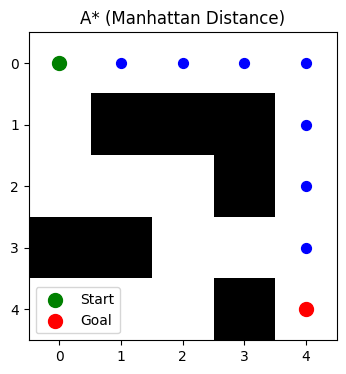

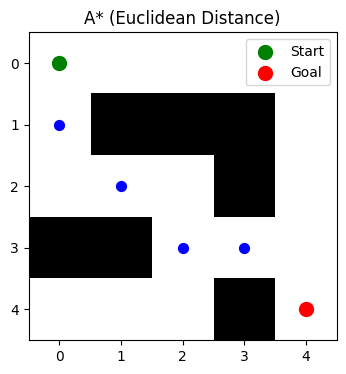

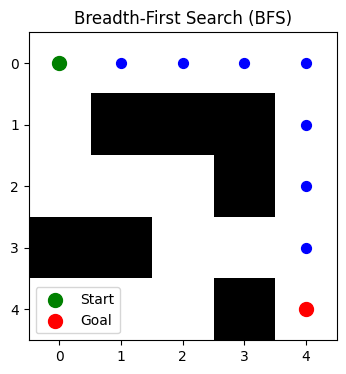

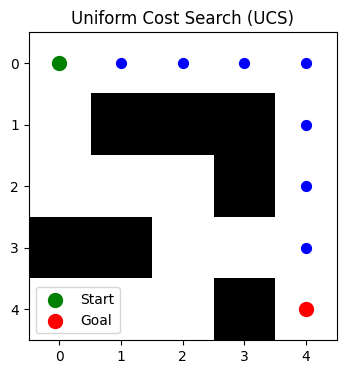

In [18]:
grid = np.array([
    [0, 0, 0, 0, 0],
    [0, 1, 1, 1, 0],
    [0, 0, 0, 1, 0],
    [1, 1, 0, 0, 0],
    [0, 0, 0, 1, 0]
])

start = (0, 0)
goal = (4, 4)

path_astar_manhattan = a_star(grid, start, goal, manhattan, allow_diagonal=False)
plot_grid(grid, start, goal, path_astar_manhattan, 'A* (Manhattan Distance)')

path_astar_euclidean = a_star(grid, start, goal, euclidean, allow_diagonal=True)
plot_grid(grid, start, goal, path_astar_euclidean, 'A* (Euclidean Distance)')

path_bfs = bfs(grid, start, goal)
plot_grid(grid, start, goal, path_bfs, 'Breadth-First Search (BFS)')

path_ucs = ucs(grid, start, goal)
plot_grid(grid, start, goal, path_ucs, 'Uniform Cost Search (UCS)')
